In [789]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [797]:
class Particle:
#     n = None
#     position = None
#     new_position = None
#     pbest = None
#     cval = None
#     velocity = None
    
    def __init__(self, n, func, s_space, max_vel):
        self.n = n
        self.position = np.asarray([np.random.random()*(s[1]-(s[0]))+(s[0]) for s in s_space])
        self.new_position = np.asarray([np.random.random()*(s[1]-(s[0]))+(s[0]) for s in s_space])
        self.pbest = func(self.position)
        self.cval = self.pbest
        self.velocity = np.random.random(n)*max_vel
        
    def update_velocity(self, gbest, max_vel, c1, c2):
        r1 = np.random.random()
        r2 = np.random.random()
        new_vel = self.velocity + c1*r1*(self.pbest-self.position) + c2*r2*(gbest-self.position)
        self.velocity = np.fmin(new_vel, max_vel*np.ones(self.n))
        return new_vel
    
    def update_pos(self, gbest, func):
        self.new_position = self.position + self.velocity
        new_f_val = func(self.new_position)
        if new_f_val < func(self.position):
            self.pbest = self.new_position
            if new_f_val < func(gbest):
                return self.new_position
        return gbest
    
    def make_step(self):
        self.position = self.new_position

In [440]:
np.fmax(np.arange(5), np.ones(5))

array([ 1.,  1.,  2.,  3.,  4.])

In [281]:
def disp(particles):
    sigma = norm(np.asarray([o.new_position for o in particles]) - np.asanyarray([o.position for o in particles]))
    return sigma.sum()
def norm(x):
    return np.sqrt((x**2).sum())

In [841]:
def SwrmPrtclOpt(n, search_space, opt_func, epsilon, prtcls_count=30, l_factor1=2, l_factor2=2, velocity_limit=1, iterno=500):
    fig, axes = plt.subplots(2,5, figsize=[10,5])
    particles = [Particle(n, opt_func, search_space, velocity_limit) for i in range(prtcls_count)]
    plot_x, plot_y = 0,0
    for i in range(iterno):
#         new_val = np.array([p.cval for p in particles])
        if disp(particles) < epsilon:
#             simplex = new_val
#             plt.plot(np.append(simplex[:,0],simplex[0,0]), np.append(simplex[:,1],simplex[0,1]))
            print('Convergence at {0:.3f}'.format(opt_func(gbest)))
#             print('Func value = ', opt_func(simplex[0]))
#             print('No of iterations =',i)
#             print('Final simplex = ', simplex)
            break
        gbest = particles[np.argmin([p.cval for p in particles])].position
        for p in particles:
            p.make_step()
            p.update_velocity(gbest, velocity_limit, l_factor1, l_factor2)
            gbest = p.update_pos(gbest, opt_func)
#         simplex = new_val
        
        if i%(iterno/10) == 0:
            axes[plot_y][plot_x].plot([p.position[0] for p in particles], [p.position[1] for p in particles], linestyle='', marker='x')
            axes[plot_y][plot_x].grid()
            axes[plot_y][plot_x].set_title(repr(plot_y*5+plot_x+1))
            print('F val={}'.format(opt_func(gbest)))
            if plot_x > 3:
                plot_x = 0
                plot_y += 1
            else:
                plot_x += 1
    print('Summary')
    print('Failed to converge\nFunction value is {0:.3f}\nArgument value'.format(opt_func(gbest)))
    print(gbest)
    axes[1][4].grid()
    plt.show()

F val=1.7678547514958738
F val=0.9562733518390896
F val=0.1914624211017723
F val=0.12260397169287293
F val=0.3812689330291813
F val=0.0001901550024356803
F val=0.00016112949732120997
F val=0.0001611294973211504
F val=0.0001611294973211504
F val=0.0001611294973211504
Summary
Failed to converge
Function value is 0.000
Argument value
[-3.7804245  -3.28207866]


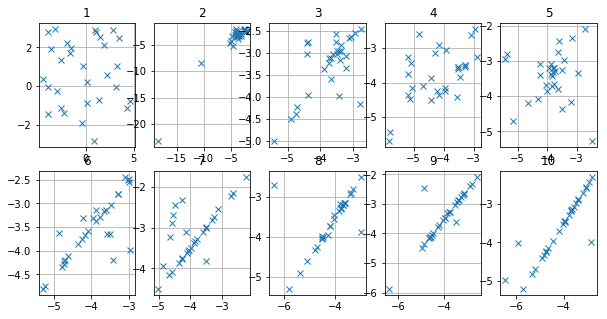

In [842]:
SwrmPrtclOpt(2, spc, Himmelblau, 1e-1, iterno=500, prtcls_count=30)

In [402]:
Himmelblau([ 3.39314238,  1.26738216])

7.173639958541349

In [604]:
ps = [Particle(2, Himmelblau, spc, 1) for i in range(5)]

In [785]:
[p.update_velocity([ 3.39314238,  1.26738216], 1, 2, 2) for p in ps]

[array([ 3.90106516,  4.16661467]),
 array([ 16.35076682,  17.67383041]),
 array([ 73.79126334,  65.8504972 ]),
 array([ 90.12102861,  92.27252397]),
 array([ 29.12566522,  25.87923755])]

In [794]:
[p.position[0] for p in ps]

[3.7733004015829348,
 2.3956633047923024,
 -3.7507929890867588,
 0.31230641160439188,
 -2.6131514888250305]

In [451]:
ggbest=np.array([ 3.39314238,  1.26738216])

In [468]:
ps[0].update_velocity(ggbest, 1, 2, 2)

In [83]:
spc = np.array([[-5,5], [-3,3]])

In [219]:
np.asarray([np.random.random()*(i-(-i))+(-i) for i in range(1,5)])

array([ 0.99761723, -0.22162526, -1.22371037, -3.82879424])

In [264]:
a

array([[ 4.46850106,  1.51207226],
       [-4.57777346,  1.83807194],
       [-4.37270726, -1.04882378],
       [-1.07560266, -1.99450951],
       [ 4.97070916, -1.48374923]])

In [267]:
b

array([[-1.05893211,  1.83884201],
       [ 0.96853092,  2.34247998],
       [-1.49533797,  2.24420928],
       [ 1.82734445, -2.68422557],
       [-0.78674856,  2.39910379]])

In [268]:
a-b

array([[ 5.52743317, -0.32676976],
       [-5.54630438, -0.50440804],
       [-2.87736929, -3.29303306],
       [-2.90294711,  0.68971606],
       [ 5.75745772, -3.88285302]])

In [432]:
ps[0].cval =2

In [433]:
ps[0].cval

2

In [790]:
plt. subplots(1,2)

(<matplotlib.figure.Figure at 0x7f623428bd30>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62317f3390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6231800f98>], dtype=object))